<a href="https://colab.research.google.com/github/susan561234/deep-learning-hw/blob/main/Resnet50_cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [5]:
def plot_history(history):
    # 繪製訓練與驗證的損失值
    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # 繪製訓練與驗證的準確率
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [6]:
from google.colab import drive

input_size = (224, 224)
batch_size = 32
train_path = '/content/drive/MyDrive/Colab Notebooks/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/test'

# 圖像擴充
train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_path,
                          target_size=input_size)

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_path,
                          target_size=input_size)

Found 7000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [7]:
# 載入預訓練的 ResNet50 模型，不包含最後一層
base_model = ResNet50(weights='imagenet', include_top=False)

# 添加自定義層
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)

# 定義完整模型
model = Model(inputs=base_model.input, outputs=predictions)

# 凍結 ResNet50 的前面幾層，只訓練最後幾層
for layer in base_model.layers:
    layer.trainable = False

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

print(model.summary())

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                             

Epoch 1/10
100/100 [==============================] - 714s 7s/step - loss: 0.2186 - accuracy: 0.9445 - val_loss: 0.0678 - val_accuracy: 0.9688
Epoch 2/10
100/100 [==============================] - 696s 7s/step - loss: 0.0608 - accuracy: 0.9756 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 697s 7s/step - loss: 0.0609 - accuracy: 0.9799 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 688s 7s/step - loss: 0.0614 - accuracy: 0.9794 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 684s 7s/step - loss: 0.0485 - accuracy: 0.9834 - val_loss: 0.0637 - val_accuracy: 0.9688
Epoch 6/10
100/100 [==============================] - 678s 7s/step - loss: 0.0484 - accuracy: 0.9815 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 687s 7s/step - loss: 0.0353 - accuracy: 0.9850 - val_loss: 0.0064 - val_accuracy: 1.0000

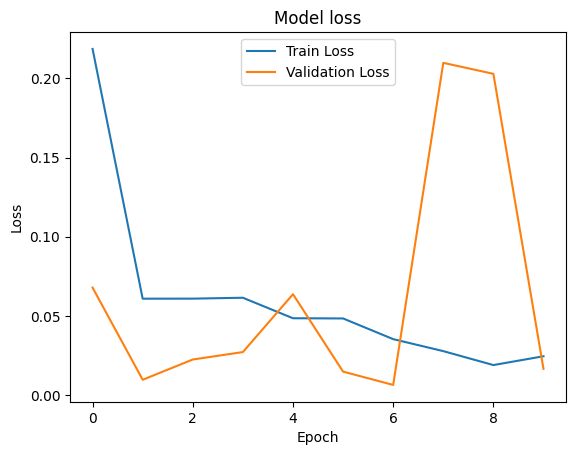

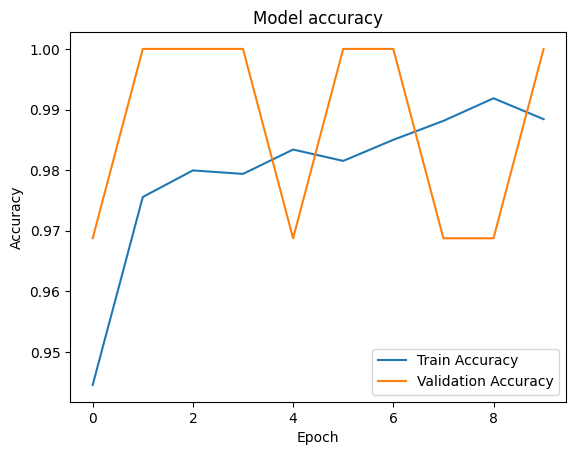

In [8]:
epochs = 10

history = model.fit(train_generator,
          validation_data=test_generator,
          steps_per_epoch=100,
          validation_steps=1,
          epochs=epochs)
plot_history(history)

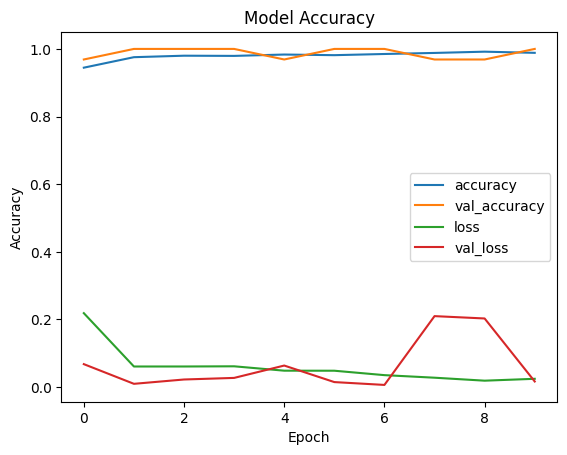

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.show(block=True)

In [14]:
test_path = '/content/drive/MyDrive/Colab Notebooks/test1'

pre_datagen = ImageDataGenerator()

pre_generator = pre_datagen.flow_from_directory(test_path,
                          target_size=input_size)
loss,accuracy = model.evaluate(pre_generator,verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Found 1554 images belonging to 2 classes.
測試資料集的準確度 = 0.97


In [17]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import csv
image_folder = "/content/drive/MyDrive/Colab Notebooks/pre"
output_file = "predictions.csv"
image_files = sorted(os.listdir(image_folder), key=lambda x: int(x.split('.')[0]))
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
  csv_writer = csv.writer(csvfile)
  csv_writer.writerow(['編號','預測標籤',"名稱","檔案名稱"])
  for idx, image_name in enumerate(image_files, start=1):
      print(image_name)
      image_path = os.path.join(image_folder, image_name)
      img_array = load_img(image_path,target_size=(224,224))
      x = img_to_array(img_array)
      x = np.expand_dims(x,axis=0)    
      pre = model.predict(x)
      print(pre)
      if pre[0][0]>pre[0][1]:
        csv_writer.writerow([idx,0,"cat",image_name])
      else:
        csv_writer.writerow([idx,1,"dog",image_name])
#img = load_img("/content/cat.5860.jpg",target_size=(224,224))
#plt.imshow(img)
# x = img_to_array(img)
# x = np.expand_dims(x,axis=0)

# pre = model.predict(x)
# if pre[0][0]>pre[0][1]:
#   print("cat")
# else:
#   print("dog")
# print(pre)


1.jpg
1/1 [==============================] - 0s 198ms/step
[[3.0787898e-05 9.9878865e-01]]
2.jpg
1/1 [==============================] - 0s 200ms/step
[[9.4651232e-06 9.9963117e-01]]
3.jpg
1/1 [==============================] - 0s 205ms/step
[[1.8996790e-05 9.9769425e-01]]
4.jpg
1/1 [==============================] - 0s 225ms/step
[[5.385158e-04 9.956445e-01]]
5.jpg
1/1 [==============================] - 0s 202ms/step
[[9.9991030e-01 2.3733845e-04]]
6.jpg
1/1 [==============================] - 0s 207ms/step
[[9.9984848e-01 2.4870364e-04]]
7.jpg
1/1 [==============================] - 0s 212ms/step
[[9.996910e-01 6.291428e-04]]
8.jpg
1/1 [==============================] - 0s 206ms/step
[[0.99917454 0.01198949]]
9.jpg
1/1 [==============================] - 0s 199ms/step
[[0.9984604  0.00298062]]
10.jpg
1/1 [==============================] - 0s 199ms/step
[[0.99593776 0.01221514]]
11.jpg
1/1 [==============================] - 0s 211ms/step
[[0.9991882  0.00223778]]
12.jpg
1/1 [=============